## What is OpenStreetMap (OSM)?
##### <div style="text-align: justify"> OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. </div>

## OSMnx 
##### <div style="text-align: justify"> OSMnx (https://osmnx.readthedocs.io/en/stable/) is a Python module that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called NetworkX.</div>

## NetworkX 

##### <div style="text-align: justify"> NetworkX is a Python package (https://networkx.org/) for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. </div>

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import random

### 1. Import driveable network for your city

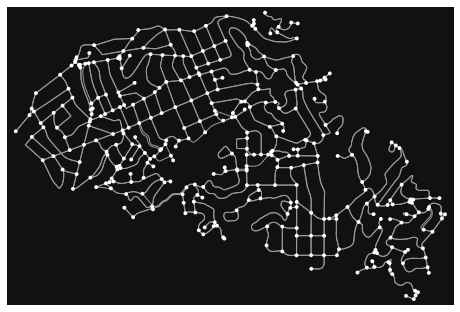

In [5]:
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

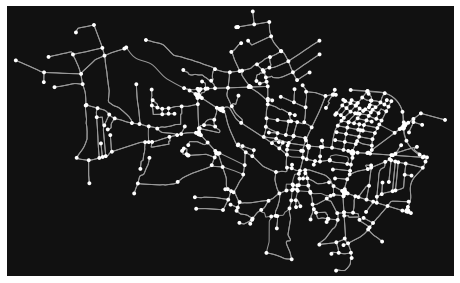

In [2]:
G = ox.graph_from_place('Wieliczka, Poland', network_type='drive')
fig, ax = ox.plot_graph(G)

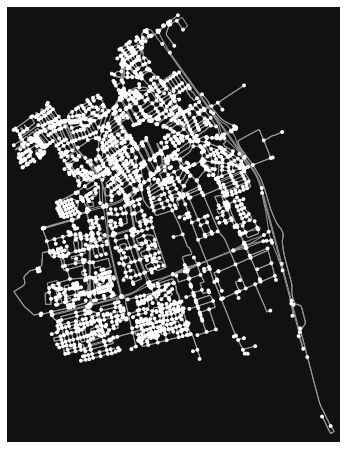

In [10]:
G1 = ox.graph_from_place('Delft, Netherlands', network_type='drive')
fig, ax = ox.plot_graph(G1)

In [65]:
ox.save_graphml(G, filepath='Wieliczka_Poland.graphml')

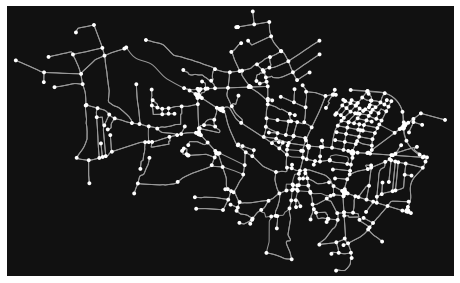

In [67]:
G1 = ox.load_graphml(filepath='Wieliczka_Poland.graphml')
fig, ax = ox.plot_graph(G1)

### 2. Plot it

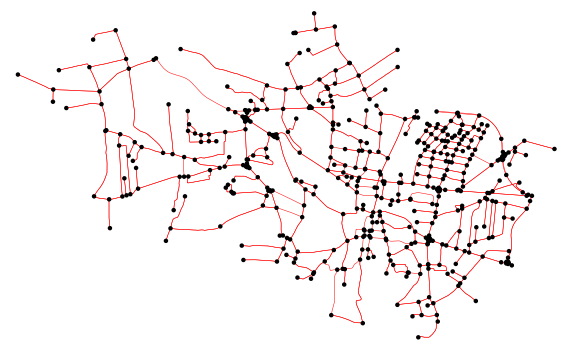

In [9]:
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=20, edge_linewidth=0.5
                        , bgcolor='white', edge_color='red', node_color='black')

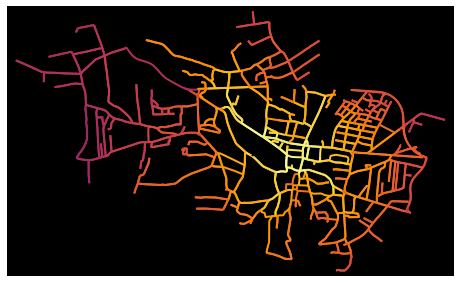

In [49]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# make a list of graph edge centrality values
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]
# create a color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]
# color the edges in the original graph by closeness centrality in line graph
fig, ax = ox.plot_graph(G, bgcolor='black', node_size=0,edge_color=ec, edge_linewidth=2, edge_alpha=1)

### 3. Graph data

In [29]:
G.nodes

NodeView((34797864, 147832962, 226741768, 248005617, 263921925, 325817816, 325821201, 699816595, 699816605, 699816722, 699816822, 699816869, 699818109, 699818163, 699818224, 699818290, 699818303, 699818304, 699818306, 699818333, 699818455, 699818460, 699818644, 699818662, 699818695, 699818704, 699818736, 699818766, 699818769, 699818808, 699818809, 699818818, 699818827, 699818839, 699818844, 699818888, 699818897, 699818908, 699818909, 699818910, 699818928, 699818930, 699818936, 699818938, 699818947, 699819016, 699819034, 699819070, 699819174, 699819189, 699819196, 699819216, 699819256, 699819279, 699819284, 699819305, 699819311, 699819315, 699819333, 699819350, 699819364, 699819365, 699819439, 699819446, 699819448, 699819475, 699819526, 699819530, 699819532, 699819533, 699819534, 699819536, 699819538, 699819591, 699819661, 699819886, 699819894, 699820010, 740149004, 740151842, 740152595, 826915476, 826915479, 1108089027, 1111895812, 1252475589, 1345873521, 1351352491, 1351352506, 135135

In [30]:
G.nodes[34797864]

{'y': 49.9896109,
 'x': 20.0809237,
 'highway': 'traffic_signals',
 'street_count': 3}

In [35]:
G.edges

OutMultiEdgeView([(34797864, 147832962, 0), (34797864, 1684082594, 0), (147832962, 2090518298, 0), (147832962, 1684082594, 0), (226741768, 2981555993, 0), (248005617, 34797864, 0), (248005617, 2981555999, 0), (263921925, 2452099172, 0), (263921925, 3884536580, 0), (325817816, 8071715968, 0), (325817816, 3884536580, 0), (325817816, 2404636646, 0), (325817816, 2090498557, 0), (325821201, 1607449310, 0), (325821201, 699819364, 0), (699816595, 1892359223, 0), (699816595, 2049450267, 0), (699816595, 3436000010, 0), (699816605, 1892359221, 0), (699816722, 1607449232, 0), (699816722, 699819189, 0), (699816822, 8078637383, 0), (699816822, 1852050064, 0), (699816869, 699816722, 0), (699816869, 1904792913, 0), (699818109, 1852875389, 0), (699818109, 1851760816, 0), (699818109, 1852875387, 0), (699818163, 699818662, 0), (699818224, 1899081674, 0), (699818224, 1883532755, 0), (699818290, 1883532724, 0), (699818290, 1851760816, 0), (699818290, 1111895812, 0), (699818303, 740149004, 0), (699818304, 

In [36]:
G.get_edge_data(34797864, 147832962)

{0: {'osmid': 462555101,
  'oneway': True,
  'lanes': '2',
  'ref': '94',
  'highway': 'primary',
  'maxspeed': '70',
  'length': 21.806}}

### gdf: A GeoDataFrame object is a pandas. DataFrame that has a column with geometry.

In [47]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes

,y,x,street_count,highway,geometry
osmid,,,,,
31349993,50.050822,19.940702,3,NaN,POINT (19.94070 50.05082)
31349996,50.051659,19.941806,4,traffic_signals,POINT (19.94181 50.05166)
31349999,50.050194,19.942645,3,NaN,POINT (19.94264 50.05019)
31350002,50.047284,19.940735,3,NaN,POINT (19.94073 50.04728)
32122170,50.051206,19.943664,4,NaN,POINT (19.94366 50.05121)
...,...,...,...,...,...
10221679209,50.048019,19.945540,3,NaN,POINT (19.94554 50.04802)
10582459207,50.051044,19.947561,4,NaN,POINT (19.94756 50.05104)
10585992180,50.050629,19.944367,3,NaN,POINT (19.94437 50.05063)


### 4. Plotting data on graph

<AxesSubplot:>

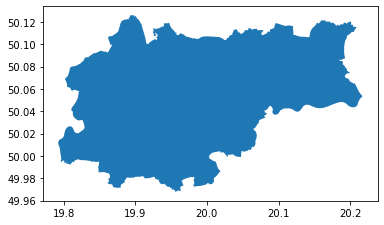

In [38]:
place ='Krakow, Poland'
area = ox.geocode_to_gdf(place)
area.plot()

In [39]:
place_name = "Kazimierz, Krakow, Poland"
graph = ox.graph_from_place(place_name)

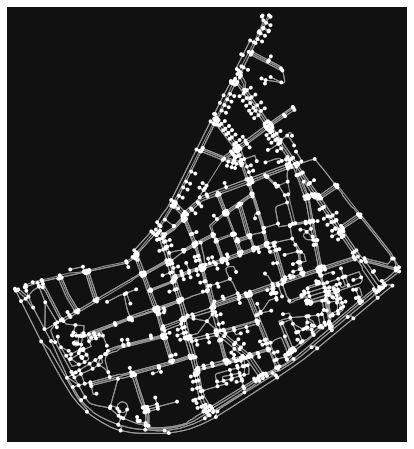

In [40]:
fig, ax = ox.plot_graph(graph)

<AxesSubplot:>

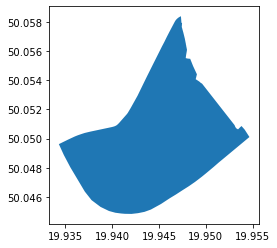

In [45]:
area = ox.geocode_to_gdf(place_name)
area.plot()

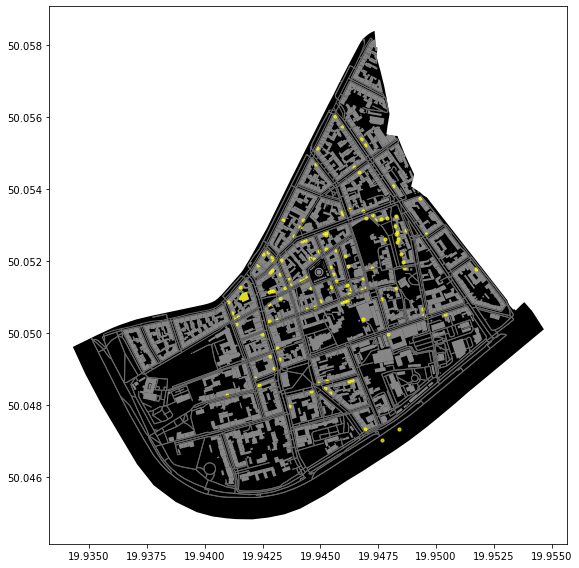

In [46]:
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

tags = {'amenity': 'restaurant'}
restaurants = ox.geometries_from_place(place_name, tags)

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

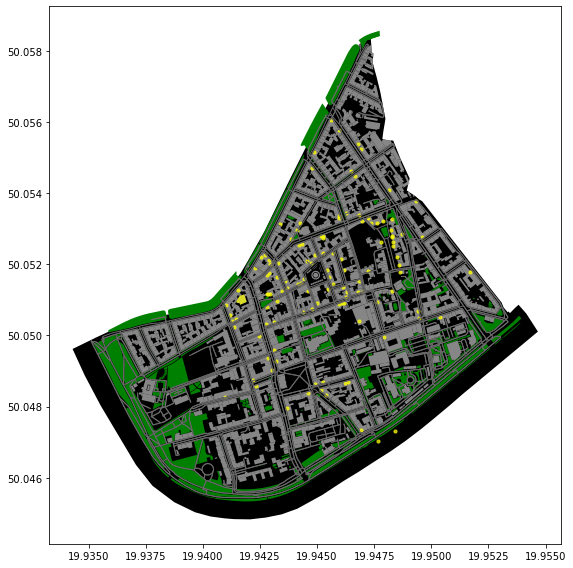

In [48]:
tags = {'leisure': 'park', 'landuse': 'grass'}
parks = ox.geometries_from_place(place_name, tags)

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

### 5. Graph searches 

In [53]:
node_list = list(G.nodes)
o = random.choice(node_list)
d = random.choice(node_list)

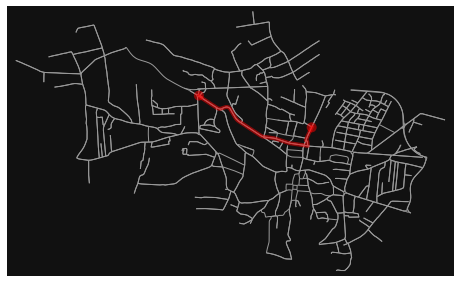

In [54]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, o, d, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [58]:
print("Shorthest path from node {} to node {} distance: {}m".format(o,d,nx.shortest_path_length(G, o, d, weight='key')))

Shorthest path from node 2050155879 to node 6092509763 distance: 14m
